# 4-Year College and University Data

#### Table information
 * Sector of institution:
  - 1 - Public college or university
  - 2 - Private nonprofit college or university
  - 3 - For-profit college or university
 * Advertised sticker price: The published cost of attendance for one year at the institution, including tuition, fees, books and other supplies and room and board.
 * Net price: The cost of attendance for one year at the institution, minus any federal, state or institutional financial aid or grants.

#### Points to explore:

 * What is average cost of universities per state?
 * Universities who give the most pell grants and those who give the least
 * What types of universities are the most expensive/cheapest

In [10]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)


data = pd.read_csv('DataExercise.csv')

print(data.columns)


Index(['UnitID', 'Institution Name', 'State abbreviation',
       'Sector of institution',
       'Percent of undergraduate students awarded Pell grants',
       'Net price 2017-18', 'Advertised sticker price 2017-18',
       'Net price 2016-17', 'Advertised sticker price 2016-17',
       'Net price 2015-16', 'Advertised sticker price 2015-16',
       'Net price 2014-15', 'Advertised sticker price 2014-15',
       'Net price 2013-14', 'Advertised sticker price 2013-14'],
      dtype='object')


Most universities in the data are private, nonprofit colleges or universities, public colleges are the next most common, and for profit/college universities are the least common.               

In [11]:
for label, row in data.iterrows():
    data.loc[label, 'Avg_net'] = (row['Net price 2013-14'] + 
                                            row['Net price 2014-15'] + 
                                            row['Net price 2015-16'] + 
                                            row['Net price 2016-17'] + 
                                            row['Net price 2017-18']) / 5
    

for label, row in data.iterrows():
    data.loc[label, 'Avg_adv'] = (row['Advertised sticker price 2013-14'] + 
                                                   row['Advertised sticker price 2014-15'] + 
                                                   row['Advertised sticker price 2015-16'] + 
                                                   row['Advertised sticker price 2016-17'] + 
                                                   row['Advertised sticker price 2017-18']) / 5
    
for label, row in data.iterrows():
    data.loc[label, 'Difference in Net and Advertised'] = (row['Avg_adv'] - row['Avg_net']) 
                                                    
    
#print(data.head())

print(data['Avg_net'].idxmax())
print(data['Avg_net'].idxmin())
print(data.iloc[168])
print(data.iloc[856])
print(data['Avg_adv'].idxmax())
print(data['Avg_adv'].idxmin())
print(data.iloc[1285])
print(data.iloc[501])

168
856
UnitID                                                                             111081
Institution Name                                         California Institute of the Arts
State abbreviation                                                                     CA
Sector of institution                                                                   2
Percent of undergraduate students awarded Pell grants                                  26
Net price 2017-18                                                                   52656
Advertised sticker price 2017-18                                                    68993
Net price 2016-17                                                                   51199
Advertised sticker price 2016-17                                                    66799
Net price 2015-16                                                                   50472
Advertised sticker price 2015-16                                                    65686
Ne

In [ ]:
plt.figure(figsize=(10,20))
plt.hist(data.Avg_net[data['Sector of institution'] == 1], 
         label='Public Colleges', bins=50, alpha=0.5, normed=True)
plt.hist(data.Avg_net[data['Sector of institution'] == 2], 
         label='Private Colleges', bins=50, alpha=0.5, normed=True)
plt.title('Average Net Price of Private and Public Universities')
plt.xlabel('Cost of Education')
plt.legend()
#plt.show()
plt.clf()

plt.figure(figsize=(10,20))
plt.hist(data.Avg_adv[data['Sector of institution'] == 1], 
         label='Public Colleges', bins=50, alpha=0.5, normed=True)
plt.hist(data.Avg_adv[data['Sector of institution'] == 2], 
         label='Private Colleges', bins=50, alpha=0.5, normed=True)
plt.xlabel('Cost of Education')
plt.title('Public and Private School Advertised Price Comparison')
plt.legend()
#plt.show()
plt.clf()

plt.figure(figsize=(10,20))
plt.hist(data['Percent of undergraduate students awarded Pell grants']
         [data['Sector of institution'] == 1], label='Public Colleges', 
         bins=50, alpha=0.5, normed=True)
plt.hist(data['Percent of undergraduate students awarded Pell grants']
         [data['Sector of institution'] == 2], label='Private Colleges', 
         bins=50, alpha=0.5, normed=True)
plt.title('Percent of Undergraduates awarded Pell Grants')
plt.xlabel('Percent')
plt.legend()
#plt.show()
plt.clf()


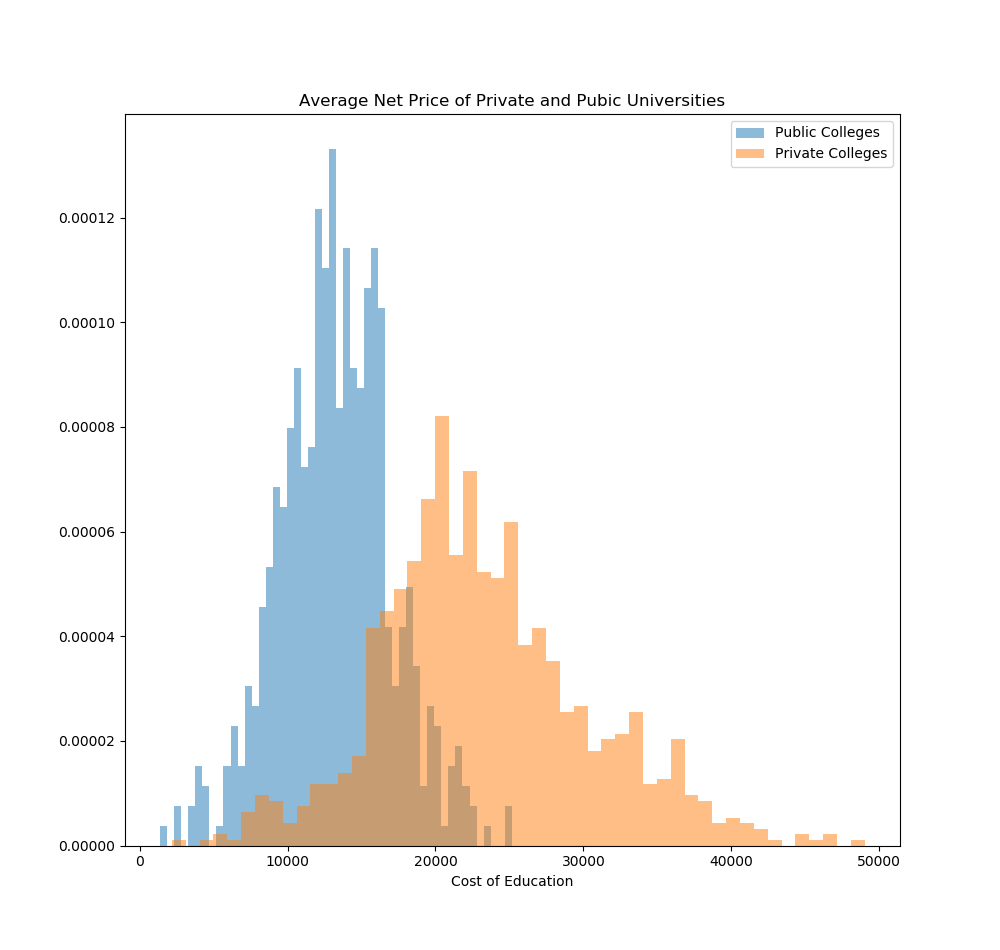

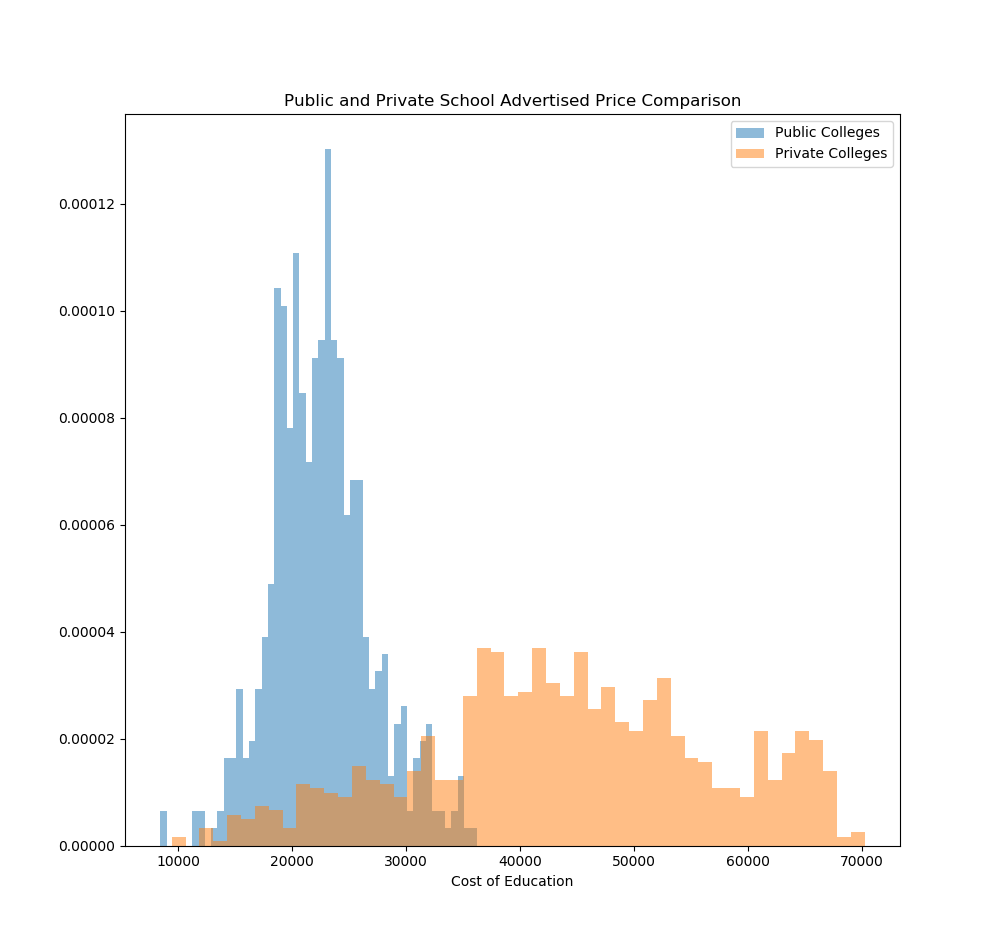

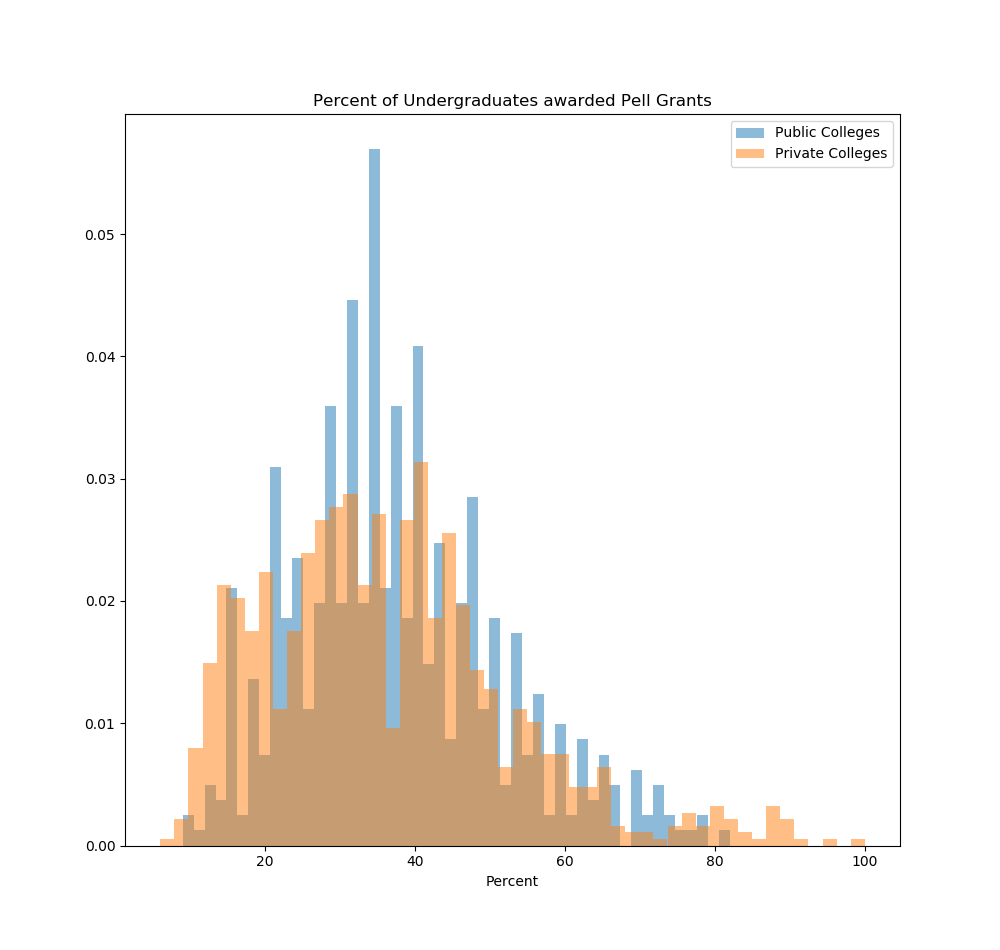


Public and Private schools follow a similar trend when comparing the net price to the advertised price. Private Universities have generally higher tuition rates, although in net tuition there is much more of an overlap between public and private school than in the advertised price. 

Private schools also tend to give a higher percentage of their population pell grants. Most public universities do not give more than 50 percent of their undergraduates pell grants. 

In [29]:
public_colleges = data[data['Sector of institution'] == 1]
#print(public_colleges)
#553 colleges are public

private_colleges = data[data['Sector of institution'] == 2]
#print(private_colleges)
#1000 colleges are private
#plt.figure(figsize=(30, 50))
#sns.boxplot(x='Average Net Price', y='State abbreviation', data=private_colleges)
#plt.show()
#plt.clf()

#plt.figure(figsize=(30, 50))
#sns.boxplot(x='Average Net Price', y='State abbreviation', data=public_colleges)
#plt.show()
#plt.clf()

cheapest_private = private_colleges.sort_values(by=['Avg_net'])
expensive_private = private_colleges.sort_values(by=['Avg_net'], ascending=False)
#print(cheapest_private.head())
print(expensive_private.head())

expensive_private_adv = private_colleges.sort_values(by=['Avg_adv'], ascending=False)
print(expensive_private_adv.head())

cheapest_public = public_colleges.sort_values(by=['Avg_net']).head()
#print(cheapest_public)

biggest_diff = data.sort_values(by=['Difference in Net and Advertised'], ascending=False)
print(biggest_diff.head(20))




      UnitID                        Institution Name State abbreviation  \
168   111081        California Institute of the Arts                 CA   
1023  122454             San Francisco Art Institute                 CA   
965   136774      Ringling College of Art and Design                 FL   
1030  143048  School of the Art Institute of Chicago                 IL   
1193  193654                          The New School                 NY   

      Sector of institution  \
168                       2   
1023                      2   
965                       2   
1030                      2   
1193                      2   

      Percent of undergraduate students awarded Pell grants  \
168                                                  26       
1023                                                 31       
965                                                  28       
1030                                                 19       
1193                                           

### Trends

Of the five most expensive schools in the data, four of them are art schools. My main focus is too see if art schools are the most expensive type of school, and if so, by how much?

Data also shows that if only calculating advertised price, none of the highest priced Universities are art schools. 

other points: The schools with the biggest difference in Advertised and Net price are some of the most selective schools, i.e. Harvard, Columbia, Yale, Standford, Duke, Dartmouth to name some.

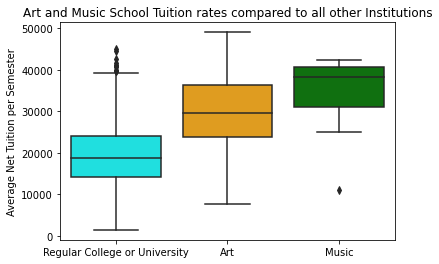

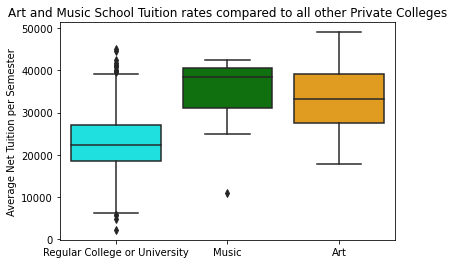

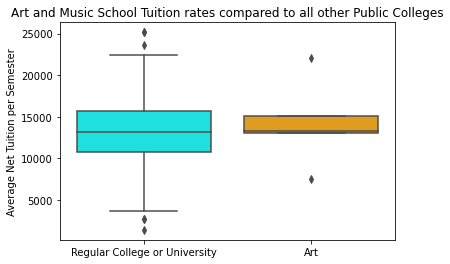

<Figure size 432x288 with 0 Axes>

In [30]:
values = ['Art', 'Arts', 'Music']
conditions = list(map(data['Institution Name'].str.contains, values))
data['is_artschool'] = np.select(conditions, values, 'Regular College or University')

pal1 = {'Regular College or University': 'cyan', 'Art':'orange', 'Music': 'green'}
pal2 = {'Regular College or University': 'cyan', 'Art': 'orange'}



sns.boxplot(x='is_artschool', y='Avg_net', data=data, palette=pal1)
plt.xlabel('')
plt.ylabel('Average Net Tuition per Semester')
plt.title('Art and Music School Tuition rates compared to all other Institutions')
plt.show()
plt.clf()

sns.boxplot(x='is_artschool', y='Avg_net', data=private_colleges, palette=pal1)
plt.xlabel('')
plt.ylabel('Average Net Tuition per Semester')
plt.title('Art and Music School Tuition rates compared to all other Private Colleges')
plt.show()
plt.clf()

sns.boxplot(x='is_artschool', y='Avg_net', data=public_colleges, palette=pal2)
plt.xlabel('')
plt.ylabel('Average Net Tuition per Semester')
plt.title('Art and Music School Tuition rates compared to all other Public Colleges')
plt.show()
plt.clf()


Want to see if the difference in tuition between art school and regular school is still significant with the advertised price

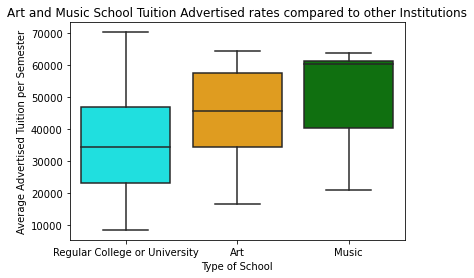

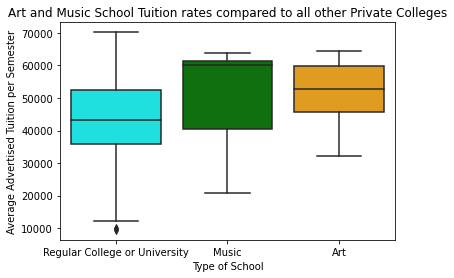

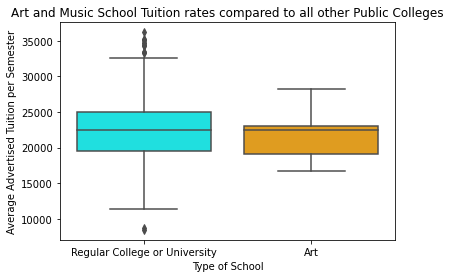

<Figure size 432x288 with 0 Axes>

In [28]:
sns.boxplot(x='is_artschool', y='Avg_adv', data=data, palette=pal1)
plt.xlabel('Type of School')
plt.ylabel('Average Advertised Tuition per Semester')
plt.title('Art and Music School Tuition Advertised rates compared to other Institutions')
plt.show()
plt.clf()

sns.boxplot(x='is_artschool',y='Avg_adv', data=private_colleges, palette=pal1)
plt.xlabel('Type of School')
plt.ylabel('Average Advertised Tuition per Semester')
plt.title('Art and Music School Tuition rates compared to all other Private Colleges')
plt.show()
plt.clf()

sns.boxplot(x='is_artschool',y='Avg_adv', data=public_colleges, palette=pal2)
plt.xlabel('Type of School')
plt.ylabel('Average Advertised Tuition per Semester')
plt.title('Art and Music School Tuition rates compared to all other Public Colleges')
plt.show()
plt.clf()


Boxplots show that even compared to other private schools, Art and Music schools are significantly more expensive. It also shows that there are no public music universities.

Of the 39 Art schools in the country, 27 are private, 5 are public and 7 are for-profit universities.

Note: If going by Advertised Price alone, there is much more overlap with the price of private schools and the price of art schools, as well as the fact that the prices range higher for private universities and lower for art schools when only taking into account Advertised. 

In [38]:
print(public_colleges[public_colleges.is_artschool == 'Art'])

      UnitID                                   Institution Name  \
549   187745  Institute of American Indian and Alaska Native...   
694   166674            Massachusetts College of Art and Design   
695   167288              Massachusetts College of Liberal Arts   
1366  199184    University of North Carolina School of the Arts   
1399  207722         University of Science and Arts of Oklahoma   

     State abbreviation  Sector of institution  \
549                  NM                      1   
694                  MA                      1   
695                  MA                      1   
1366                 NC                      1   
1399                 OK                      1   

      Percent of undergraduate students awarded Pell grants  \
549                                                  35       
694                                                  29       
695                                                  47       
1366                                        

In [ ]:
ax1 = plt.subplot(1,2,1)
sns.boxplot(x='is_artschool',
            y='Percent of undergraduate students awarded Pell grants',
            data=private_colleges)
ax1.set_xticklabels(['Private Colleges', 'Music School', 'Art School'])
ax1.set_yticks(range(10, 101, 5))
plt.title('Percent of Pell grants given by Private Colleges and Art Schools')

plt.xlabel('')

ax2 = plt.subplot(1,2,2)
sns.boxplot(x='is_artschool',
           y='Percent of undergraduate students awarded Pell grants',
           data=public_colleges)
ax2.set_xticklabels(['Public Colleges', 'Art School'])
ax2.set_yticks(range(10, 101, 5))
plt.xlabel('')
plt.title('Percent of Pell grants given by Public Colleges and Art Schools')
plt.show()
plt.clf()


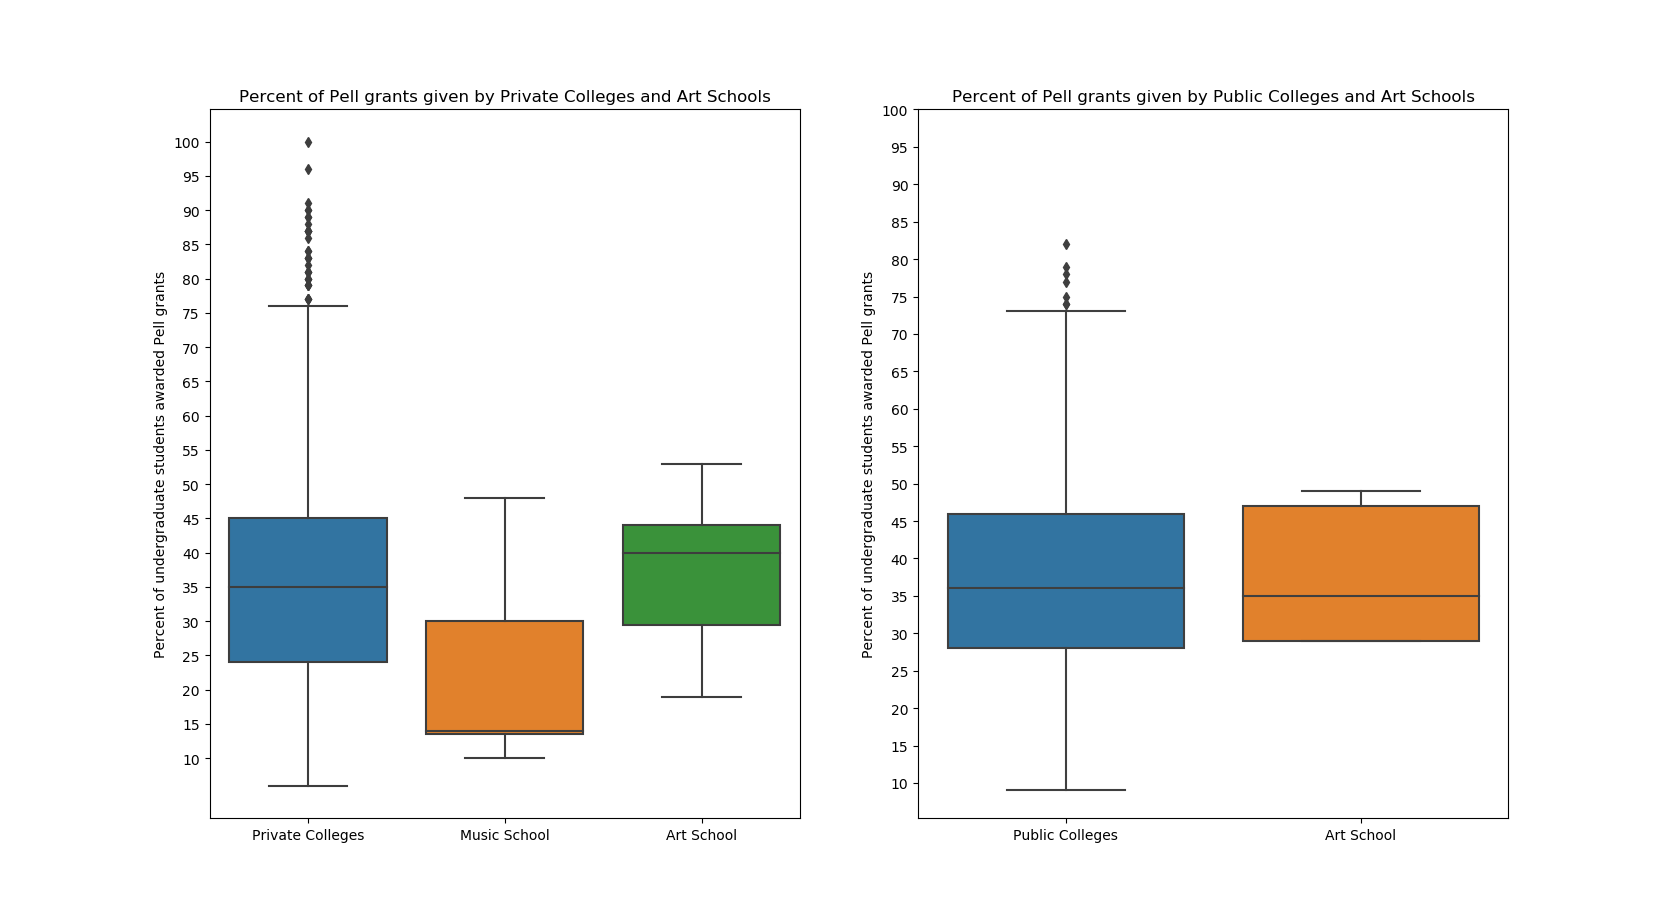

Although Art Schools have Pell Grants given rates comparable to other public and private schools, music schools on average give less Pell Grants, despite having the highest tuition rates among the group

In [33]:
art_school = data[(data['Institution Name'].str.contains('|'.join(['Art', 'Arts'])))]
music_school = data[(data['Institution Name'].str.contains('|'.join(['Music', 'Musical'])))]

#print(art_school.count())

#39 art schools
avg_artschool_cost = np.mean(art_school.Avg_net)
avg_school_cost = np.mean(data.Avg_net)
avg_private_cost = np.mean(private_colleges.Avg_net)
avg_public_cost = np.mean(public_colleges.Avg_net)
avg_music_school = np.mean(music_school.Avg_net)


print('The Average cost to attend a Private College/University is ' + str(avg_private_cost))
print('The Average cost to attend Art School is ' + str(avg_artschool_cost))
print('The Average cost to attend Music School is ' + str(avg_music_school))
print('The Average cost to attend Public College/University is ' + str(avg_public_cost))



The Average cost to attend a Private College/University is 23288.231800000012
The Average cost to attend Art School is 29857.88205128205
The Average cost to attend Music School is 33551.28571428572
The Average cost to attend Public College/University is 13232.502712477397


### Statistics 

Art schools are 22% more expensive than private schools, and more than double the cost of Public Universities.

Music Schools are on average 30% more expensive than other private schools and two and a half times more expensive than public universities

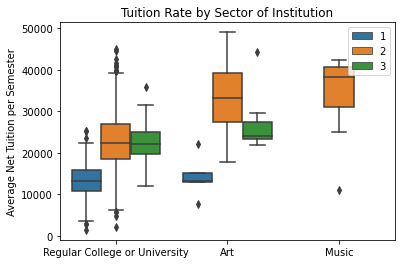

<Figure size 432x288 with 0 Axes>

In [74]:
sns.boxplot(x='is_artschool', y='Avg_net', hue= 'Sector of institution', data=data)
plt.xlabel('')
plt.ylabel('Average Net Tuition per Semester')
plt.title('Tuition Rate by Sector of Institution')
plt.legend()
plt.show()
plt.clf()